<a href="https://colab.research.google.com/github/ClementGuerin-wagon/Olympic-Games/blob/main/Projet_JO_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Countries.csv")


In [ ]:
df.drop(columns = ["Export (% GDP)", "Import (% GDP)", "R&D", "Export", "Import", "Net Trade", "Year"], inplace=True)

In [ ]:
df_no_null = df.dropna(axis = 0)

In [ ]:
df["GDP"].isnull().value_counts() / df_no_null.shape[0]

False    1.251429
True     0.017143
Name: GDP, dtype: float64

In [ ]:
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 5105
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country Name                   4025 non-null   object 
 1   Country Code                   4025 non-null   object 
 2   Agriculture (% GDP)            4025 non-null   float64
 3   Ease of Doing Business         4025 non-null   float64
 4   Education Expenditure (% GDP)  4025 non-null   float64
 5   GDP                            4025 non-null   float64
 6   Health Expenditure (% GDP)     4025 non-null   float64
 7   Industry (% GDP)               4025 non-null   float64
 8   Inflation Rate                 4025 non-null   float64
 9   Service (% GDP)                4025 non-null   float64
 10  Unemployment                   4025 non-null   float64
 11  Population                     4025 non-null   float64
 12  Land                           4025 non-null   f

In [ ]:
df_countries = df_no_null.groupby('Country Code').mean()

<ipython-input-7-bc39b29c97ca>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_countries = df_no_null.groupby('Country Code').mean()


In [ ]:
df_countries

,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),GDP,Health Expenditure (% GDP),Industry (% GDP),Inflation Rate,Service (% GDP),Unemployment,Population,Land,Education Expenditure,Health Expenditure,GDP Per Capita,Population Density
Country Code,,,,,,,,,,,,,,,
AFG,27.501127,40.717968,13.670101,1.415197e+10,10.902580,20.494909,6.124620,48.302753,8.804143,2.986318e+07,652860.0,1.913599e+09,1.577329e+09,468.447271,45.742085
AGO,7.466224,39.344634,7.448087,6.742329e+10,2.956530,52.736052,45.993530,40.175590,7.019739,2.492156e+07,1246700.0,5.131686e+09,1.901788e+09,2620.868878,19.990020
ALB,19.360804,64.763660,11.672968,1.126265e+10,6.093392,22.723143,2.547181,45.369225,15.022826,2.930193e+06,28750.0,1.341022e+09,6.907093e+08,3885.436636,101.919757
ARE,1.114786,79.072322,6.928438,3.002527e+11,3.347504,50.287642,2.080245,48.597561,2.556304,7.171237e+06,98647.9,2.077680e+10,1.067106e+10,40669.975477,72.695286
ARM,14.686083,71.790710,11.390571,9.176261e+09,8.299488,25.968177,3.775962,50.513640,11.315783,2.947563e+06,29740.0,1.021385e+09,8.252066e+08,3170.642504,99.111064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,10.396215,61.289418,14.807963,6.543111e+08,5.147312,20.626801,3.828648,64.852742,7.207087,1.987129e+05,2840.0,9.837952e+07,3.468236e+07,3250.176625,69.969320
YEM,12.946455,32.668556,19.971232,2.474992e+10,5.199995,38.529367,11.113982,31.512917,12.833609,2.573682e+07,527970.0,4.751987e+09,1.275336e+09,946.405314,48.746743
ZAF,2.348864,66.137888,19.001748,3.278162e+11,7.584471,25.276975,5.253065,63.220869,22.347391,5.291467e+07,1219090.0,6.198479e+10,2.519122e+10,6127.573381,43.405056


In [ ]:
# import des CSV, le premier sans distinction de saison et un pour chaque saison de JO.
df_medals = pd.read_csv("/content/drive/MyDrive/medals_participation.csv")
df_win = pd.read_csv("/content/drive/MyDrive/medals_participation_win.csv")
df_sum = pd.read_csv("/content/drive/MyDrive/medals_participation_sum.csv")

In [ ]:
df_medals

,NOC,nb_medal,nb_participations
0,AFG,0.142857,9.000000
1,AHO,0.066667,5.266667
2,ALB,0.000000,6.363636
3,ALG,1.062500,34.437500
4,AND,0.000000,7.681818
...,...,...,...
225,YEM,0.000000,4.571429
226,YMD,0.000000,5.000000
227,YUG,13.000000,86.100000
228,ZAM,0.153846,14.076923


In [ ]:
# merge des 2 tables, sans disctinction par saison
merged_df = pd.merge(df_countries, df_medals, left_on='Country Code', right_on='NOC', how='inner')

In [ ]:
##merge des 2 tables, pour les JO d'été
merged_df_sum = pd.merge(df_countries, df_sum, left_on='Country Code', right_on='NOC', how='inner')

In [ ]:
merged_df_sum

,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),GDP,Health Expenditure (% GDP),Industry (% GDP),Inflation Rate,Service (% GDP),Unemployment,Population,Land,Education Expenditure,Health Expenditure,GDP Per Capita,Population Density,NOC,nb_medal,nb_participations
0,27.501127,40.717968,13.670101,1.415197e+10,10.902580,20.494909,6.124620,48.302753,8.804143,2.986318e+07,6.528600e+05,1.913599e+09,1.577329e+09,468.447271,45.742085,AFG,0.142857,9.000000
1,19.360804,64.763660,11.672968,1.126265e+10,6.093392,22.723143,2.547181,45.369225,15.022826,2.930193e+06,2.875000e+04,1.341022e+09,6.907093e+08,3885.436636,101.919757,ALB,0.000000,7.875000
2,14.686083,71.790710,11.390571,9.176261e+09,8.299488,25.968177,3.775962,50.513640,11.315783,2.947563e+06,2.974000e+04,1.021385e+09,8.252066e+08,3170.642504,99.111064,ARM,2.666667,29.000000
3,2.599960,80.657646,13.548759,1.084853e+12,8.835345,25.003528,2.743566,65.186201,5.434391,2.242556e+07,7.741220e+06,1.473276e+11,9.862016e+10,47116.288822,2.896902,AUS,48.296296,262.666667
4,1.305638,78.773098,10.560431,3.754829e+11,10.110815,26.318482,2.223452,61.634292,5.102043,8.474337e+06,8.387900e+04,3.961002e+10,3.836939e+10,44062.914447,101.030501,AUT,6.071429,105.392857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.060705,83.668618,14.404180,1.632347e+13,15.575834,19.743835,2.493215,75.641135,5.854391,3.101665e+08,9.755518e+06,2.340556e+12,2.581740e+12,52106.978409,31.784778,USA,178.642857,538.000000
97,26.572002,65.602968,22.995038,4.623811e+10,5.090768,24.650969,12.173760,38.168795,6.480913,2.941115e+07,4.454804e+05,1.061924e+10,2.372048e+09,1499.079608,65.998219,UZB,5.500000,77.333333
98,4.424233,31.532608,18.579773,2.452296e+11,6.005379,47.054704,72.740289,41.758026,8.471870,2.813662e+07,9.120500e+05,4.556311e+10,1.435976e+10,8569.037491,30.849870,VEN,0.789474,48.315789
99,17.032840,66.641310,16.318864,1.781195e+11,4.416429,36.811009,5.894889,40.983665,1.823478,8.852587e+07,3.307040e+05,2.851900e+10,8.218330e+09,1931.480745,267.662890,VNM,0.000000,10.333333


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
y = merged_df['nb_medal']
X = merged_df[['nb_participations', 'GDP', 'Education Expenditure', 'Health Expenditure', 'Agriculture (% GDP)']]

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
y_sum = merged_df_sum['nb_medal']
X_sum = merged_df_sum[['nb_participations', 'GDP', 'Education Expenditure', 'Health Expenditure', 'Agriculture (% GDP)']]

In [ ]:
df_test = merged_df[merged_df['NOC'].isin(['FRA', 'RUS', 'USA', 'ITA', 'GER'])]
df_train = merged_df[~ (merged_df['NOC'].isin(['FRA', 'RUS', 'USA', 'ITA', 'GER']))]

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
df_test_sum = merged_df_sum[merged_df_sum['NOC'].isin(['FRA', 'RUS', 'USA', 'ITA', 'GER'])]
df_train_sum = merged_df_sum[~ (merged_df_sum['NOC'].isin(['FRA', 'RUS', 'USA', 'ITA', 'GER']))]

In [ ]:
y_test = df_test['nb_medal']
X_test = df_test[['nb_participations', 'GDP', 'Education Expenditure', 'Health Expenditure', 'Agriculture (% GDP)']]

y_train = df_train['nb_medal']
X_train = df_train[['nb_participations', 'GDP', 'Education Expenditure', 'Health Expenditure', 'Agriculture (% GDP)']]

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
y_test_sum = df_test_sum['nb_medal']
X_test_sum = df_test_sum[['nb_participations', 'GDP', 'Education Expenditure', 'Health Expenditure', 'Agriculture (% GDP)']]

y_train_sum = df_train_sum['nb_medal']
X_train_sum = df_train_sum[['nb_participations', 'GDP', 'Education Expenditure', 'Health Expenditure', 'Agriculture (% GDP)']]

In [ ]:
df_test

,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),GDP,Health Expenditure (% GDP),Industry (% GDP),Inflation Rate,Service (% GDP),Unemployment,Population,Land,Education Expenditure,Health Expenditure,GDP Per Capita,Population Density,NOC,nb_medal,nb_participations
32,1.661364,76.398452,9.670713,2.447258e+12,10.843351,18.482279,1.556782,69.489455,8.825870,6.501534e+07,5.491013e+05,2.366807e+11,2.677327e+11,37474.820310,118.403292,FRA,34.843137,250.156863
44,2.051219,72.519510,8.705833,1.922948e+12,8.562253,22.428954,1.928778,65.464630,9.380609,5.900514e+07,3.020689e+05,1.664123e+11,1.657683e+11,32526.117518,195.336699,ITA,32.098039,210.098039
75,4.046896,76.292522,11.225776,1.353758e+12,5.240592,30.616571,9.925566,53.375564,6.548636,1.439450e+08,1.709825e+07,1.552391e+11,7.113227e+10,9423.601384,8.418698,RUS,72.812500,321.437500
96,1.060705,83.668618,14.404180,1.632347e+13,15.575834,19.743835,2.493215,75.641135,5.854391,3.101665e+08,9.755518e+06,2.340556e+12,2.581740e+12,52106.978409,31.784778,USA,112.740000,377.060000


df_train[df_train['NOC'] not in ['FRA', 'RUS'])

```
# Ce texte est au format code
```



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
X_train_sum, X_test_sum, y_train_sum, y_test_sum = train_test_split(X_sum, y_sum, test_size = 0.2)

In [ ]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
std_scaler = StandardScaler()
X_train_sum = std_scaler.fit_transform(X_train_sum)
X_test_sum = std_scaler.transform(X_test_sum)

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
model.fit(X_train_sum,y_train_sum)

LinearRegression()

In [ ]:
y

0        0.142857
1        0.000000
2        1.333333
3       28.695652
4        9.000000
          ...    
96     112.740000
97       2.833333
98       0.652174
99       0.000000
100      0.000000
Name: nb_medal, Length: 101, dtype: float64

In [ ]:
model.score(X_test,y_test)

0.5602556247802037

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
model.score(X_test_sum,y_test_sum)

0.7575874087905461

In [ ]:
X_test

array([[-7.25252817e-01, -2.71535495e-01, -2.62787372e-01,
        -1.94542806e-01, -4.61599649e-01],
       [ 1.37214135e+00, -4.40980060e-02, -2.65699846e-02,
        -3.73927584e-02, -8.88078415e-01],
       [-7.03909204e-01, -2.77720055e-01, -2.64233885e-01,
        -1.97241097e-01, -8.21037238e-01],
       [-2.35416897e-01, -2.55726496e-01, -2.27372644e-01,
        -1.89342621e-01,  1.20550609e+00],
       [-1.82120640e-01, -2.51813055e-01, -2.26575659e-01,
        -1.89367698e-01,  7.87129309e-01],
       [-2.33345311e-01,  5.62012438e-01,  6.16025869e-01,
         2.02073221e-03,  4.53330315e-01],
       [-6.82992463e-01, -2.71852825e-01, -2.58764959e-01,
        -1.96156003e-01, -5.98435237e-01],
       [-6.81013328e-01, -2.73398402e-01, -2.57954155e-01,
        -1.96509423e-01,  1.19204556e+00],
       [-6.85670116e-01, -2.76648119e-01, -2.62578752e-01,
        -1.96570764e-01, -1.78325506e-01],
       [-6.90035855e-01, -2.76873404e-01, -2.63451057e-01,
        -1.96904423e-01

In [ ]:
y_predict = model.predict(X_test)
y_predict

array([-3.19634968, 31.75680691, -3.15141814,  6.38777254,  6.83255762,
       11.10470131, -2.5985644 , -0.97154471, -2.28196283, -2.45469326,
       41.5111627 ,  1.80786617,  3.81412187, -1.24486855,  3.38509036,
       19.72317882,  1.92254874,  7.60830417, -1.37215114, -3.15708233,
       43.86100936])

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
y_predict_sum = model.predict(X_test_sum)

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predict)

mae

3.9926185111911017

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
from sklearn.metrics import mean_absolute_error

mae_sum = mean_absolute_error(y_test_sum, y_predict_sum)

mae_sum

5.251214379824215

In [ ]:
merged_df

,Agriculture (% GDP),Ease of Doing Business,Education Expenditure (% GDP),GDP,Health Expenditure (% GDP),Industry (% GDP),Inflation Rate,Service (% GDP),Unemployment,Population,Land,Education Expenditure,Health Expenditure,GDP Per Capita,Population Density,NOC,nb_medal,nb_participations
0,27.501127,40.717968,13.670101,1.415197e+10,10.902580,20.494909,6.124620,48.302753,8.804143,2.986318e+07,6.528600e+05,1.913599e+09,1.577329e+09,468.447271,45.742085,AFG,0.142857,9.000000
1,19.360804,64.763660,11.672968,1.126265e+10,6.093392,22.723143,2.547181,45.369225,15.022826,2.930193e+06,2.875000e+04,1.341022e+09,6.907093e+08,3885.436636,101.919757,ALB,0.000000,6.363636
2,14.686083,71.790710,11.390571,9.176261e+09,8.299488,25.968177,3.775962,50.513640,11.315783,2.947563e+06,2.974000e+04,1.021385e+09,8.252066e+08,3170.642504,99.111064,ARM,1.333333,18.416667
3,2.599960,80.657646,13.548759,1.084853e+12,8.835345,25.003528,2.743566,65.186201,5.434391,2.242556e+07,7.741220e+06,1.473276e+11,9.862016e+10,47116.288822,2.896902,AUS,28.695652,166.043478
4,1.305638,78.773098,10.560431,3.754829e+11,10.110815,26.318482,2.223452,61.634292,5.102043,8.474337e+06,8.387900e+04,3.961002e+10,3.836939e+10,44062.914447,101.030501,AUT,9.000000,102.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.060705,83.668618,14.404180,1.632347e+13,15.575834,19.743835,2.493215,75.641135,5.854391,3.101665e+08,9.755518e+06,2.340556e+12,2.581740e+12,52106.978409,31.784778,USA,112.740000,377.060000
97,26.572002,65.602968,22.995038,4.623811e+10,5.090768,24.650969,12.173760,38.168795,6.480913,2.941115e+07,4.454804e+05,1.061924e+10,2.372048e+09,1499.079608,65.998219,UZB,2.833333,41.250000
98,4.424233,31.532608,18.579773,2.452296e+11,6.005379,47.054704,72.740289,41.758026,8.471870,2.813662e+07,9.120500e+05,4.556311e+10,1.435976e+10,8569.037491,30.849870,VEN,0.652174,40.217391
99,17.032840,66.641310,16.318864,1.781195e+11,4.416429,36.811009,5.894889,40.983665,1.823478,8.852587e+07,3.307040e+05,2.851900e+10,8.218330e+09,1931.480745,267.662890,VNM,0.000000,10.333333


In [ ]:
new = merged_df.query("NOC == 'FRA'")

new = new[['nb_participations', 'GDP', 'Education Expenditure', 'Health Expenditure', 'Agriculture (% GDP)']]

new = std_scaler.transform(new)

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
new_sum = merged_df_sum.query("NOC == 'FRA'")

new_sum = new_sum[['nb_participations', 'GDP', 'Education Expenditure', 'Health Expenditure', 'Agriculture (% GDP)']]

new_sum = std_scaler.transform(new_sum)

In [ ]:
model.predict(new)

array([39.49696927])

In [ ]:
# même démarche que précédemment mais avec la table des JO d'été
model.predict(new_sum)

array([56.45185447])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-45-669a3005695b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr())


<Axes: >

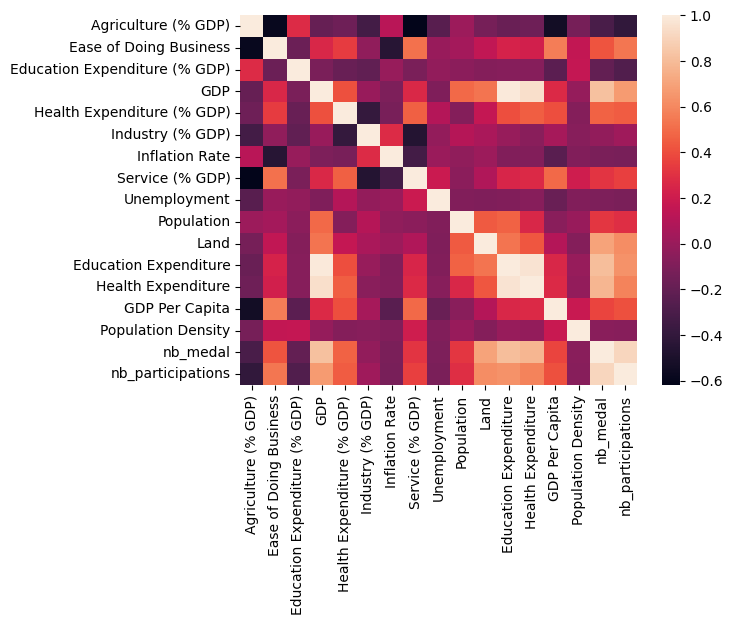

In [ ]:
sns.heatmap(merged_df.corr())